# Supervised Machine Learning: Regression

## Main Objective:

The main objective of this analysis is to predict the median_house_value using independent variable from the given dataset.

## Summary:

This "Calafornia Housing Price Prediction dataset" is taken from the kaggle. It has 20640 rows and 10 columns. It has null entries in 'total_bedrooms' column and has only one categorical column named as 'ocean_proximity'.

Here, the target variable is 'median_house_value' which we have to predict from the independent variables that are available in the dataset. The median house value will increase with increase in total_rooms, total_bedrooms and decrease with increase in housing_median_age, population, median_income.

# 1. Data Description

This dataset has 206400 entries out of which 20640 rows and 10 columns. This dataset not need so much data cleaning because it only has few null entries. The description of dataset is available in Cell 4 and for more information about dataset anyone can refer the Kaggle website or can use this link https://www.kaggle.com/camnugent/california-housing-prices.

In [1]:
# import useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Storing dataset in a variable

df = pd.read_csv('housing.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. Data Exploration

In data exploration, we will find total null entries that are avaiable in the dataset and also check for categorical variables. Here, I will check the shape, description, number of null entries and dtypes to know much more about the dataset.

In [3]:
# Actual shape of dataset

df.shape

(20640, 10)

In [4]:
# Description of dataset

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Checking Null values

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Checking the categorical variables

print(df.columns.tolist())
print(df.dtypes)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# 3. Data Cleaning

From the above observations, I came to know that this dataset has only 207 null entries in total_bedrooms columns. As this dataset has 20640 rows so we can easily drop the null values because it will not impact our prediction or training.

In [7]:
# Dropping Null values

df = df.dropna()
df.shape

(20433, 10)

# 4. Data Visualization

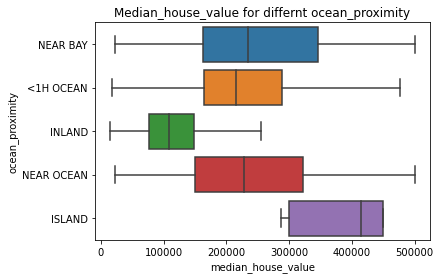

In [8]:
sns.boxplot(x='median_house_value', y='ocean_proximity', data=df, showfliers=False)
plt.title('Median_house_value for differnt ocean_proximity')
plt.show()

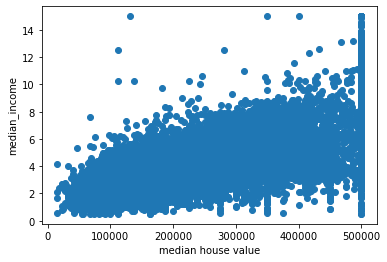

In [9]:
plt.scatter(df['median_house_value'], df['median_income'])
plt.xlabel('median house value')
plt.ylabel('median_income')
plt.show()

# 4. Feature Engineering

In feature engineering I will:
1. remove categorical variable using LabelEncoder from sklearn.preprocessing.
2. split the dataset in X_train, X_test, y_train, y_test with 30% test size.
3. transform the independent variables of train and test using StandardScalar from sklearn.preprocessing.

In [10]:
# Entries based on ocean_proximity

df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# Handling categorical values

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
df['ocean_proximity'] = lbl.fit_transform(df['ocean_proximity'])

In [12]:
# Again checking for categorical values

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int32
dtype: object

In [13]:
# Creating X and y variable for independent and dependent variables

X = df.drop('median_house_value', axis=1)
y = df.median_house_value

In [14]:
# train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

In [15]:
# Shape of train and test of X and y

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14303, 9)
X_test shape:  (6130, 9)
y_train shape:  (14303,)
y_test shape:  (6130,)


In [16]:
# Applying feature scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# 5. Model Training

In [17]:
# Model training using LinearRegression and calculate rmse and score 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_score = r2_score(y_test, lr_pred)
print(lr_rmse, lr_score)

71790.29646306216 0.6235484525790906


In [18]:
# model training using regularization RidgeCV

from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.005, 0.05, 0.01, 0, 1, 5, 10, 15, 20, 30, 50]

ridge = RidgeCV(alphas=alphas, cv=5)
ridge = ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_score = r2_score(y_test, ridge_pred)

print(ridge.alpha_, ridge_rmse, ridge_score)

5.0 71790.40786866326 0.6235472842082792


In [19]:
# model training using regularization RidgeCV

from sklearn.linear_model import LassoCV

alphas2 = [1e-5, 5e-5, 0.0001, 0.0005]

lasso = LassoCV(alphas=alphas2, cv=3)
lasso = lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_score = r2_score(y_test, lasso_pred)

print(lasso.alpha_, lasso_rmse, lasso_score)

0.0005 71790.29651481574 0.6235484520363234


In [20]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)
elastic = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios)
elastic = elastic.fit(X_train, y_train)

elastic_pred = elastic.predict(X_test)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_pred))

print(elastic.alpha_, elastic_rmse)

0.0005 71790.3599652517


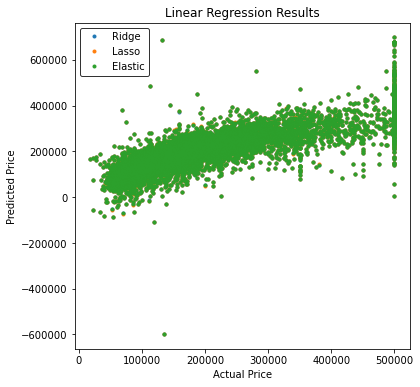

In [21]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'Elastic']

models = [ridge, lasso, elastic]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', ylabel='Predicted Price', title='Linear Regression Results');

From the above model trainings using regularization or without using regularization, the root mean square error(rmse) and r2_score is almost same. There is only minor change after the decimal point.

So, from the above observation I came to know that we can predict the target variable using regularization or without reguralization. It will not impact our results. The reason for the same score and rmse may be the less number of columns. So, while prediction outcome in this dataset we can use simple training model as it takes less time to run and also give same score and error as regularization models.

# 6. Key findings

1. From the visualizations we can see that the median_cost of house in california increase with increase in the median_income.
2. The median cost of house in california is high at "near bay" and "near ocean" as compare to other locations.

# 7. Conclusion

From above observations, the score is only 62% which is less for a accurate model. So, we can increase the score, accuracy and can minimize the error of the model by adding some features. The accuracy of the model is less because the dataset contains more rows and only 10 features. If some more useful features are added in this dataset then, it will perform much more better.
This dataset is not that much good to predict the cost of houses in the california.